In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

def periodic_graphene_2(num_x, num_y, a=1, if_draw=False, if_periodic=False):
    if np.mod(num_x, 2) != 0:
        raise ValueError("num_x should be an even number")
    

    pair_1 = np.array([[0, 0], [-1/2, np.sqrt(3)/2]]) * a
    chain_1 = []
    for y in range(num_y):
        chain_1 += [atom + np.array([0, np.sqrt(3) * a * y]) for atom in pair_1]
        
    pair_2 = np.array([[1, 0], [3/2, np.sqrt(3)/2]]) * a
    chain_2 = []
    for y in range(num_y):
        chain_2 += [atom + np.array([0, np.sqrt(3) * a * y]) for atom in pair_2]
    
    coords = []
    for x in range(num_x):
        if np.mod(x, 2) == 0:
            coords += [item + np.array([[3 * a * np.floor(x/2), 0]]) for item in chain_1]

        if np.mod(x, 2) == 1:
            coords += [item + np.array([[3 * a * np.floor(x/2), 0]]) for item in chain_2]
            
    coords = [item[0] for item in coords]

    adjancency = [np.array([0, 1]) + y + 2*num_y * x for y in range(2*num_y-1) for x in range(num_x)]
    adjancency += [np.array([2*y, 2*y+2*num_y]) + 2*num_y*x for y in range(num_y) for x in range(0, num_x-1, 2)]
    adjancency += [np.array([2*y+1, 2*y+2*num_y+1]) + 2*num_y*x for y in range(num_y) for x in range(1, num_x-1, 2)]

    periodic_adjancency = []
    if if_periodic:
        periodic_adjancency = [np.array([1, 2*(num_x-1)*num_y+1]) + 2*y for y in range(num_y)]
        periodic_adjancency += [np.array([0, 2*num_y-1]) + 2*num_y * x for x in range(num_x)]
        

    if if_draw:
        plt.scatter([c[0] for c in coords], [c[1] for c in coords], color="k") 
 
        for (ind1, ind2) in adjancency:
            plt.plot([coords[ind1][0], coords[ind2][0]], [coords[ind1][1], coords[ind2][1]], 'r-', linewidth=2)

        for (ind1, ind2) in periodic_adjancency:
            plt.plot([coords[ind1][0], coords[ind2][0]], [coords[ind1][1], coords[ind2][1]], 'b-', linewidth=2)
        
        for (ind, (x, y)) in enumerate(coords):
            plt.text(x, y, f"  {ind}", fontsize=10)
            
        plt.plot(title="$(num_x)x$(num_y) graphe")            
        plt.gca().set_aspect('equal')
        plt.show()

    adjancency += periodic_adjancency
    
    return coords, adjancency

# Datalysis for a given num_x, num_y and J1

The allowed range of num_x, num_y and J1 are the following

num_xs = [2, 4, 6]

num_ys = [2,3,4,5,6,7,8,9]

J1range = [-0.01, -0.03, -0.05, -0.07]

In [2]:
num_x, num_y = 4, 3
J1 = -0.01
J2 = 0.019894 # Fixed value

In [3]:
# Extract data

with open(f"data/Open_graphene_Aquila_data/result_{num_x}_{num_y}/J1_{J1}.json", "r") as f:
    result = json.load(f)
    
measurements = result['measurements']  
preseqs = [meas['shotResult']['preSequence'] for meas in measurements]
postseqs = [meas['shotResult']['postSequence'] for meas in measurements]

# Post-select the successfully prepared atom arrangements

valid_postseqs = [postseq for preseq, postseq in zip(preseqs, postseqs) if sum(preseq) == len(preseq)]
valid_postseqs = ["".join(['r' if i == 0 else 'g' for i in seq]) for seq in valid_postseqs]
print(f"number of successful initializations = {len(valid_postseqs)} out of {len(measurements)} shots")
counters = {}
for post_sequence in valid_postseqs:
    if post_sequence in counters:
        counters[post_sequence] += 1
    else:
        counters[post_sequence] = 1

# Sort the outputs according to number of occurance        
counters = {k: v for k, v in sorted(counters.items(), key=lambda item: item[1], reverse=True)}

number of successful initializations = 892 out of 1000 shots


# Get the most likely configuration

The most likely config IS unique
The most likely config has prob = 11.1% and reads
grgrgrrgrggrrgrgrggrgrgr
The number of Rydberg atoms in the most likely config = 12
The expected number of Rydberg atoms                  = 12
The most likely config looks like the following


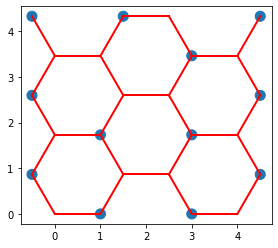

In [6]:
# Get the most likely configuration
sorted_configs = sorted(counters, key=counters.get, reverse=True)
if counters[sorted_configs[0]] == counters[sorted_configs[1]]:
    print("The most likely config IS NOT unique")
else:
    print("The most likely config IS unique")

max_config = sorted_configs[0]
print(f"The most likely config has prob = {round(counters[max_config]/len(valid_postseqs) * 100, 2)}% and reads")
print(max_config)


# Get the number of Rydberg atoms in the most likely output and compare to expected results
max_config_bit = [1 if i=='r' else 0 for i in max_config]


print(f"The number of Rydberg atoms in the most likely config = {sum(max_config_bit)}")
if J2 > abs(J1):
    expected_ryd = num_x * num_y
elif 2 * J2 > abs(J1) > J2:
    expected_ryd = num_x * num_y + 1
elif 3 * J2 > abs(J1) > 2 * J2:
    expected_ryd = num_x*num_y+1+(num_x-1+num_y-1)
elif abs(J1) > 3 * J2:
    expected_ryd = num_x * num_y * 2
print(f"The expected number of Rydberg atoms                  = {expected_ryd}")


# Plot the most likely config

print("The most likely config looks like the following")

coords, adjancency = periodic_graphene_2(num_x, num_y, if_draw=False, if_periodic=False) ;  

plt.scatter([c[0] for c in coords],
            [c[1] for c in coords],
            s = (np.array(max_config_bit) +0.01) * 100,
            )

for (ind1, ind2) in adjancency:
    plt.plot([coords[ind1][0], coords[ind2][0]], [coords[ind1][1], coords[ind2][1]], 'r-', linewidth=2)

# for (ind, (x, y)) in enumerate(coords):
#     plt.text(x, y, f"  {ind}", fontsize=10)

plt.plot(title="$(num_x)x$(num_y) graphe")      
plt.gca().set_aspect('equal')
plt.show()


# Get the distribution for a given num_x, num_y and J1

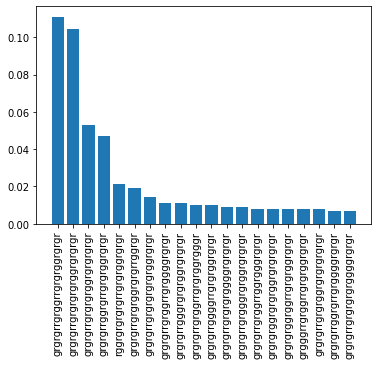

In [5]:
num_config_shown = 20 # number of configs shown
if num_config_shown > len(counters):
    num_config_shown = len(counters)
    
num_total_configs = sum(counters.values())

plt.bar(range(num_config_shown), np.array(list(counters.values())[:num_config_shown]) / num_total_configs, align='center')
plt.xticks(range(num_config_shown), list(counters.keys())[:num_config_shown], rotation=90)

plt.show()